## [Optional] Part IV: Working with more realistic sequences

In [13]:
# load libraries

from utils import *
from sequence_alignment_viewer import *
from build_tree import *
from make_bifurcating_sequences import *

from Bio.Seq import Seq

import logomaker

In [14]:
# DNA sequences

seq_length = 40

seq1 = random_DNA(length=seq_length)
print("DNA sequence of our ancestor: " + seq1)

sequences = make_bifurcating_seqs(seq1, num_mutations=10, num_gens=3)

p = view_alignment(sequences, language='DNA', plot_width=1000)
pn.pane.Bokeh(p)

DNA sequence of our ancestor: CGTGTCGCTGCGCTTTAGCTACCTGCCACAGCTTAAGCTA


BokehModel(combine_events=True, render_bundle={'docs_json': {'d3c95a98-4e9b-4409-8a73-26c535c6075f': {'version…

In [15]:
# protein sequences

sequences_protein = {name: str(Seq(seq).translate()) for name, seq in sequences.items()}
sequences_protein

p = view_alignment(sequences_protein, language='protein', plot_width=800)
pn.pane.Bokeh(p)

/Users/wheelern/miniconda3/lib/python3.10/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


BokehModel(combine_events=True, render_bundle={'docs_json': {'71354e9e-ad11-4904-a4e4-447b283071eb': {'version…

In [16]:
clrs =  {'A':'red','L':'red','I':'red','V':'red','M':'red','F':'red','Y':'red','W':'red', # hydrophobic
                 'H':'blue','K':'blue','R':'blue', # basic
                 'D':'green','E':'green', # acidic
                 'S':'orange','T':'orange','N':'orange','Q':'orange', # polar
                 'C':'pink','U':'pink','G':'pink','P':'pink', # special cases
                 '-':'white', '*':'black'}

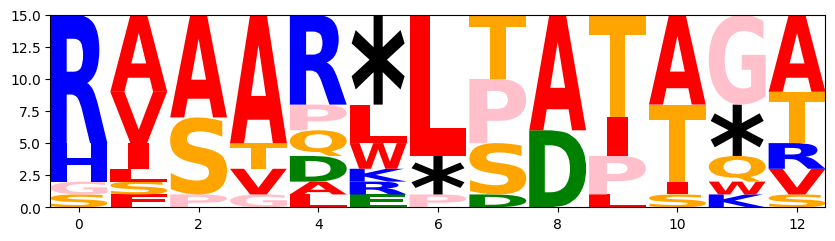

In [17]:
seqs = list(sequences_protein.values())
ars_df = logomaker.alignment_to_matrix(seqs)
ars_logo = logomaker.Logo(ars_df, color_scheme=clrs)